In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# MAchine learning libraries
from sklearn.covariance import EllipticEnvelope

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix, make_scorer

from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [2]:
df = pd.read_csv('../../../creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


0    284315
1       492
Name: Class, dtype: int64


<BarContainer object of 2 artists>

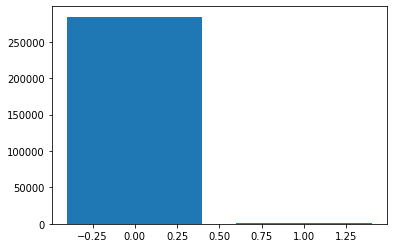

In [6]:
print(df["Class"].value_counts())
plt.bar(df["Class"].value_counts().index,df["Class"].value_counts().values)

/home/igori/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


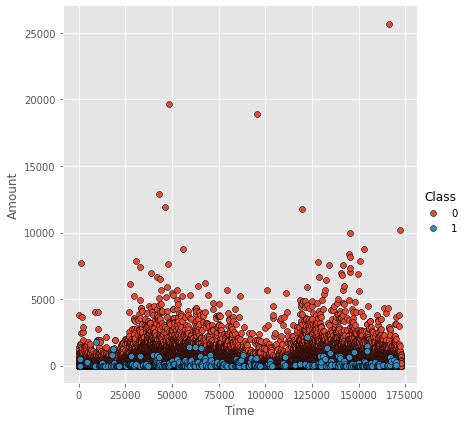

In [7]:
plt.style.use("ggplot")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

/home/igori/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/igori/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/igori/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/igori/anaconda3/lib/python3.7/site-pac

Class
0    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
1    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
dtype: object

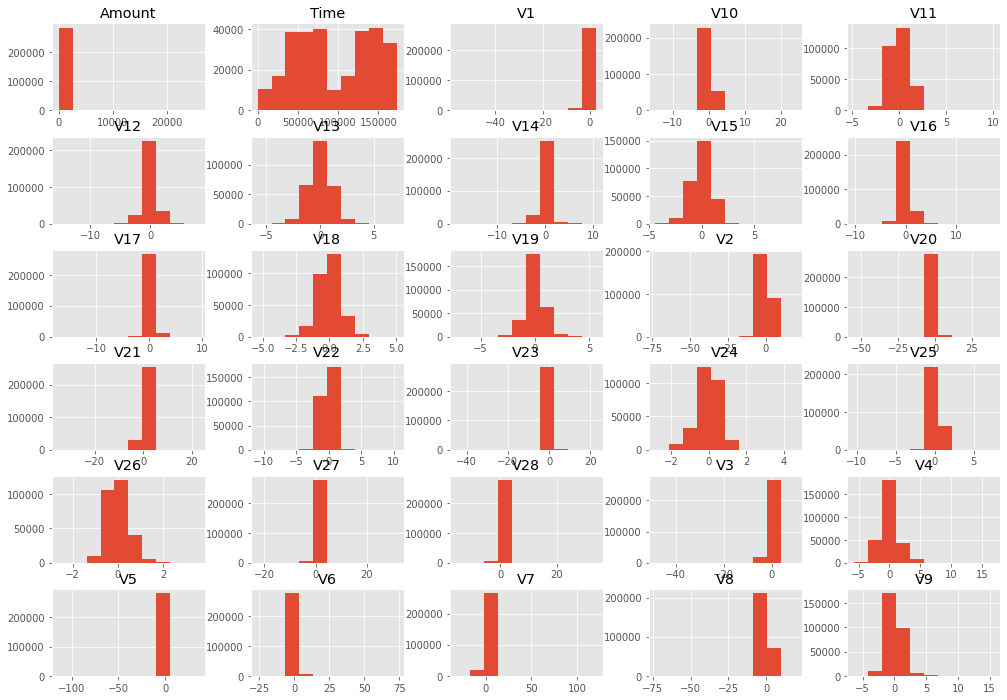

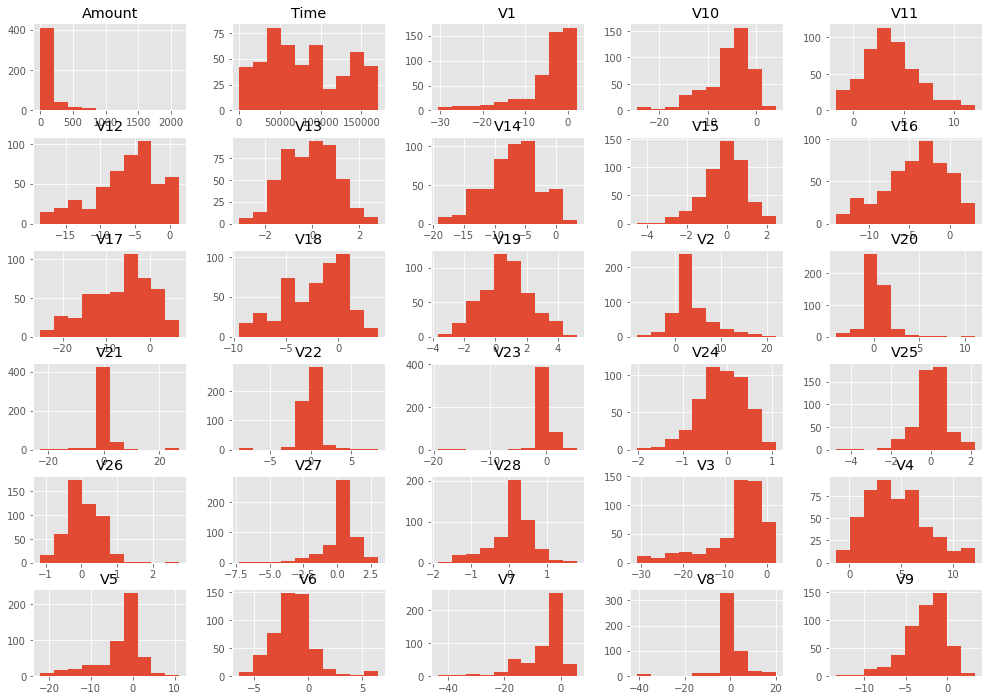

In [8]:
df.groupby('Class').hist(figsize=(17, 12))

In [9]:
X = df.drop(columns=['Class'])
y = df['Class']

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()

In [21]:
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X.copy()))

In [23]:
n_outliers = len(df[df['Class']==1])
n_inliers = len(df[df['Class']==0])

outlier_fraction = n_outliers/float(n_inliers)

In [24]:
y = y.astype(np.int8)
y[y==1] = -1
y[y==0] = 1

In [25]:
skf = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
folds = list(skf.split(X_scaled, y))

In [26]:
folds

[(array([     0,      1,      2, ..., 284804, 284805, 284806]),
  array([     3,      6,      7, ..., 284796, 284799, 284802])),
 (array([     0,      3,      5, ..., 284801, 284802, 284805]),
  array([     1,      2,      4, ..., 284803, 284804, 284806])),
 (array([     1,      2,      3, ..., 284804, 284805, 284806]),
  array([     0,      5,     16, ..., 284797, 284798, 284800])),
 (array([     0,      1,      2, ..., 284803, 284804, 284806]),
  array([     8,     14,     20, ..., 284795, 284801, 284805]))]

In [27]:
ell = EllipticEnvelope()

In [28]:
f1sc = make_scorer(f1_score, pos_label=-1, average='binary')
ps = {
        "contamination": np.linspace(0.0, 0.05, 4),
        "support_fraction": np.linspace(1, 10, 4)
    }
search = GridSearchCV(estimator=ell, param_grid=ps, scoring=f1sc, cv=folds)

In [29]:
search.fit(X, y)

GridSearchCV(cv=[(array([     0,      1,      2, ..., 284804, 284805, 284806]),
                  array([     3,      6,      7, ..., 284796, 284799, 284802])),
                 (array([     0,      3,      5, ..., 284801, 284802, 284805]),
                  array([     1,      2,      4, ..., 284803, 284804, 284806])),
                 (array([     1,      2,      3, ..., 284804, 284805, 284806]),
                  array([     0,      5,     16, ..., 284797, 284798, 284800])),
                 (array([     0,      1,      2, ..., 284803, 284804, 284806]),
                  array([     8,     14,     20, ..., 284795, 284801, 284805]))],
             estimator=EllipticEnvelope(),
             param_grid={'contamination': array([0.        , 0.01666667, 0.03333333, 0.05      ]),
                         'support_fraction': array([ 1.,  4.,  7., 10.])},
             scoring=make_scorer(f1_score, pos_label=-1, average=binary))

In [30]:
df = pd.DataFrame(search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_contamination,param_support_fraction,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,31.527054,3.245886,0.069378,0.017676,0,1,"{'contamination': 0.0, 'support_fraction': 1.0}",0.000028,0.000000,0.000000,0.000000,0.000007,0.000012,13
1,37.011834,2.305968,0.077067,0.014193,0,4,"{'contamination': 0.0, 'support_fraction': 4.0}",0.000028,0.000000,0.000000,0.000000,0.000007,0.000012,13
2,32.880609,0.768627,0.074227,0.014759,0,7,"{'contamination': 0.0, 'support_fraction': 7.0}",0.000028,0.000000,0.000000,0.000000,0.000007,0.000012,13
3,30.601064,1.222750,0.059686,0.005530,0,10,"{'contamination': 0.0, 'support_fraction': 10.0}",0.000028,0.000000,0.000000,0.000000,0.000007,0.000012,13
4,28.958282,0.396790,0.059687,0.006118,0.0166667,1,"{'contamination': 0.016666666666666666, 'suppo...",0.033474,0.033393,0.032523,0.032007,0.032849,0.000613,9
5,28.182562,1.630096,0.056696,0.002592,0.0166667,4,"{'contamination': 0.016666666666666666, 'suppo...",0.033474,0.033393,0.032523,0.032007,0.032849,0.000613,9
6,27.896262,0.745317,0.056302,0.002507,0.0166667,7,"{'contamination': 0.016666666666666666, 'suppo...",0.033474,0.033393,0.032523,0.032007,0.032849,0.000613,9
7,27.359810,0.663353,0.053776,0.000299,0.0166667,10,"{'contamination': 0.016666666666666666, 'suppo...",0.033474,0.033393,0.032523,0.032007,0.032849,0.000613,9
8,27.376125,0.560335,0.054553,0.000289,0.0333333,1,"{'contamination': 0.03333333333333333, 'suppor...",0.066529,0.064558,0.063927,0.063111,0.064531,0.001262,5
9,36.368550,2.420178,0.072694,0.010394,0.0333333,4,"{'contamination': 0.03333333333333333, 'suppor...",0.066529,0.064558,0.063927,0.063111,0.064531,0.001262,5


In [32]:
df[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False).head()

,mean_test_score,std_test_score,params
12,0.095322,0.002207,"{'contamination': 0.05, 'support_fraction': 1.0}"
13,0.095322,0.002207,"{'contamination': 0.05, 'support_fraction': 4.0}"
14,0.095322,0.002207,"{'contamination': 0.05, 'support_fraction': 7.0}"
15,0.095322,0.002207,"{'contamination': 0.05, 'support_fraction': 10.0}"
8,0.064531,0.001262,"{'contamination': 0.03333333333333333, 'suppor..."
